<a href="https://colab.research.google.com/github/GarciaMasterSG/AMY/blob/main/01Module_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
# PYTOCH WORKFLOW

In [174]:
import torch
from torch import nn # nn CONTAINS ALL OF PYTORCH'S BUILDING BLOCKS FOR NEURAL NETWORKS
import matplotlib.pyplot as plt

# CHECK PYTORCH VERSION

torch.__version__

'2.8.0+cu126'

In [175]:
# DATA (PREPARING AND LOADING)

# DATA CAN BE ALMOST ANYTHING...IN MACHINE LEARNING

# EXCELS
# IMAGES
# VIDEOS
# AUDIO
# TEXT
# DNA

# MACHINE LEARNING IS A GAME OF TWO PARTS:

# 1. GET DATA INTO NUMERICAL REPRESENTATION
# 2. BUILD A MODEL TO LEARN PATTERNS IN THAT NUMERICAL REPRESENTATION

# TO SHOWCASE THIS, LET'S CREATE SOME *KNOWN* DATA USING THE LINEAR REGRESSION FORMULA

# LINEAR REGRESSION =  (Y = A + bX)

# WE WILL USE A LINEAR REGRESSION FORMULA TO MAKE A STRAIGHT LINE WITH KNOWN PARAMETERS.

In [176]:
# CREATE *KNOWN" PARAMETERS

weight = 0.7
bias = 0.3

# CREATE

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [177]:
len(X), len(y)

(50, 50)

In [178]:
# SPLITTING DATA INTO TRAINING AND TEST SETS
# (ONE OF THE MOST IMPORTANT CONCEPTS IN MACHINE LEARNING)

# LET'S CREATE A TRAINING AND TEST SET WITH OUR DATA

# CREATE A TRAIN/TEST SPLIT

train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
Xtrain, ytrain = X[:train_split], y[:train_split]
Xtest, ytest = X[train_split:], y[train_split:]

len(Xtrain), len(ytrain), len(Xtest), len(ytest)


(40, 40, 10, 10)

In [179]:
# How might we better visialize our data?

# This is where the data explorer's motto comes in!

# Visualize, visualize, visualize


In [180]:
def plot_predictions(train_data = Xtrain,
                     train_labels = ytrain,
                     test_data = Xtest,
                     test_labels = ytest,
                     predictions = None):
  plt.figure(figsize=(10, 7))

# PLOT TRAINING
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

# PLOT TEST
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 17})



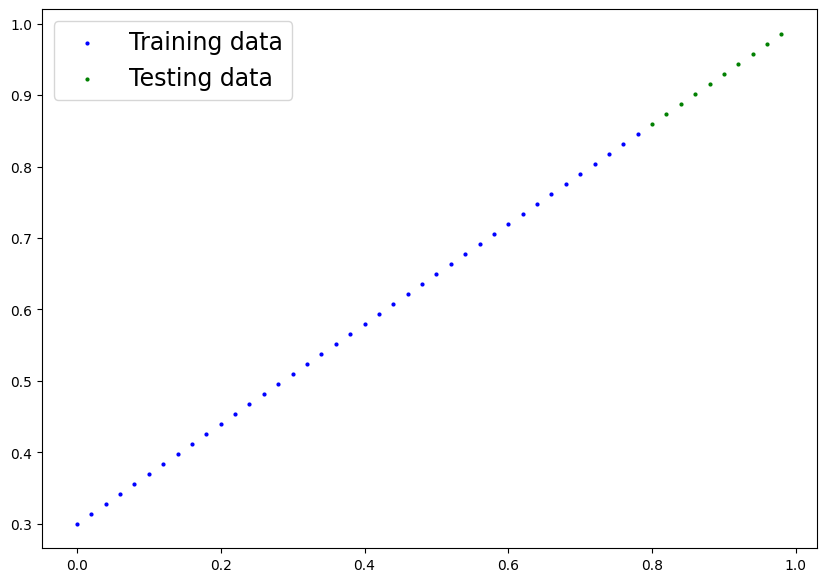

In [181]:
plot_predictions()

In [182]:
# BUILD MODEL

class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherits from nn.Models
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))

    # FORWARD METHOD TO DEFINE THE COMPUTATION IN THE MODEL

  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input
      return self.weights * x + self.bias # this is the lienear formula



In [183]:
# PYTORCH MODEL BUILDING ESSENTIALS

# torch.nn - contains all of the buildings for computational graph (a neural network can be considered a compitational graph)
# torch.nn.Parameter - what parameters should our model try and learn,  often a Pytorch layer from torch.nn will set these for us
# torch.nn.model - the base class for all neural network modules, if you subclass it, you should overwrite forward()
# torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
# def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


In [184]:
# CHECKING THE CONTENTS OF OUR PYTORCH MODEL

# NOW WE'VE CREATED  MODEL, LET'S SEE WHAT'S INSIDE...

# SO WE CAN CHECK OUR MODEL PARAMETERS OR WHAT IS INSIDE OUR MODEL USING .PARAMETERS()

In [185]:
# CREATE A RANDOM SEED

# torch.manual_seed(50)

# CREATE AN INSTANCE OF THE MODEL (THIS IS A SUBCLASS OF nn.Module)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([-0.9764], requires_grad=True),
 Parameter containing:
 tensor([-0.0830], requires_grad=True)]

In [186]:
# LIST NAME PARAMETERS

model_0.state_dict()

OrderedDict([('weights', tensor([-0.9764])), ('bias', tensor([-0.0830]))])

In [187]:
# MAKING PREDICTION USING "torch.inference_mode()"

# TO CHECK OUR MODEL'S PREDICTIVE POWER, LET'S SEE HOW WELL IT PREDICTS 'y_test' based on 'X_test'

# WHEN WE PASS PASS DATA THROUGH OUR MODEL, IT IS GOING TO RUN THROUGH THE 'forward()' METHOD

In [188]:
# MAKE PREDICTIONS WITH MODEL

with torch.inference_mode():
  y_preds = model_0(Xtest)

y_preds

tensor([[-0.8641],
        [-0.8837],
        [-0.9032],
        [-0.9227],
        [-0.9423],
        [-0.9618],
        [-0.9813],
        [-1.0008],
        [-1.0204],
        [-1.0399]])

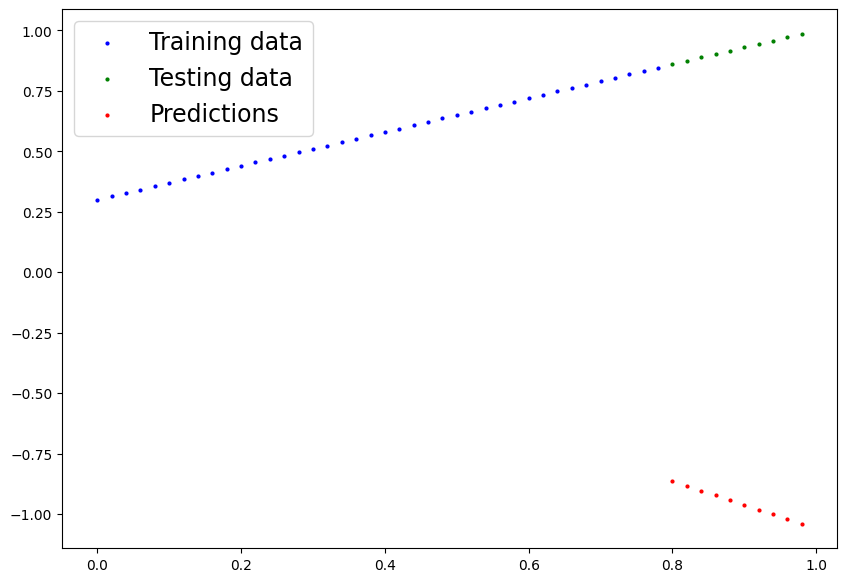

In [189]:
plot_predictions(predictions=y_preds)

In [190]:
# TRAIN MODEL

# THE WHOLE ODEA OF TRAINING IS FOR A MODEL MOVE FROM SOME "UNKNOWN" PARAMETERS (THESE MAY BE RANDOM) TO SOME "KNOWN" PARAMETERS.

# FROM A POOR REPRESENTATION TO A BETTER REPRESENTATION

# ONE WAY TO MEASURE HOW POOR YOUR MODEL PREDICTIONS ARE IS TO USE A LOSS FUNCTION

# LOSS FUNCTION MAY ALSO BE CALLED COST FUNCTION OR CRITERION IN DIFFERENT AREAS.


# THINGS WE NEED TO TRAIN:

# LOSS FUNCTION: A FUNCTION TO MEASURE HOW WRONG YOUR MODEL'S PREDICTIONS ARE TO THE IDEAL OUTPUT
# OPTIMIZER: TAKES INTO ACCOUNT THE LOSS OF A MODEL AND ADJUST THE MODEL'S PARAMETERS(WEIGHT & BIAS...) TO IMPROVE THE LOSS FUNCTION

# AND SPECIFICALLY FOR PYTORCH, WE NEED:
# A TRAIN LOOP
# A TESTING LOOP

In [191]:
# SETUP A LOSS FUNCTION
loss_fn = nn.L1Loss()

# SETUP A OPTIMIZER
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1) # lr = learning rate = possibly the most important hyperparameter you can set

In [192]:
# BUILDING A TRAINING LOOP (AND TESTING LOOP) IN PYTORCH

# A COUPLE OF THINGS WE NEED A TRAINING LOOP:
# 1. LOOP THROUGH THE DATA
# 2. FORWARD PASS (THIS INVOLVES DATA MOVING THROUGH OUR MODEL'S 'FORWARD()')
# 3. CALCULATE THE LOSS (COMPARE FORWARD PASS PREDICTIONS TO GROUND TRUTH LABELS)
# 4. OPTIMIZER ZERO GRAD
# 5. LOSS BACKWARD - MOVE BACKWARDS THROUGH THE NETWORK TO CALCULATE THE GRADIENTS OF EACH OF THE PARAMETERS OF OUR MODEL WITH RESPECT TO THE LOSS
# 6. OPTIMIZER STEP - USE THE OPTIMIZER TO ADJUST OUR MODEL'S PARAMETERS TO TRY AND IMPROVE THE LOSS

In [193]:
# AN EPOCH IS ONE LOOP THROUGH THE DATA

epochs = 100

epoch_count = []
loss_values = []
test_loss_values = []

# TRAINING:

# 1. LOOP THROUGH THE DATA

for epoch in range(epochs):
  # SET THE MODEL TO TRANING MODE
  model_0.train() # TRAIN MODE IN PYTORCH SET ALL PARAMETERS THAT REQUIRE GRADIENTS TO REQUIRE GRADIENTS

  # 2. FORWARD PASS
  y_pred = model_0(Xtrain)

  # 3. CALCULATE THE LOSS
  loss = loss_fn(y_pred, ytrain)

  # 4. OPTIMIZER ZERO GRAD
  optimizer.zero_grad()

  # 5. PERFORM BACKPROPAGATION ON THE LOSS WITH RESPECT TO THE PARAMETERS OF THE MODEL
  loss.backward()

  # 6. STEP THE OPTIMIZER (PERFORM GRADIENT DESCENT)
  optimizer.step()

  ### TESTING

  model_0.eval() #turns off differents settings in the model not needed for evaluation/testing (dropout / batch norm layers)

  with torch.inference_mode(): # turns off gradient tracking & couple more things behind scene
    # 1. Do the forward pass
    test_pred = model_0(Xtest)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, ytest)

  # Print out what 's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch {epoch} | Loss: {loss} | Test loss: {test_loss}")



  print(model_0.state_dict())


Epoch 0 | Loss: 1.036832571029663 | Test loss: 1.7403093576431274
OrderedDict({'weights': tensor([-0.9374]), 'bias': tensor([0.0170])})
OrderedDict({'weights': tensor([-0.8984]), 'bias': tensor([0.1170])})
OrderedDict({'weights': tensor([-0.8594]), 'bias': tensor([0.2170])})
OrderedDict({'weights': tensor([-0.8204]), 'bias': tensor([0.3170])})
OrderedDict({'weights': tensor([-0.7814]), 'bias': tensor([0.4120])})
OrderedDict({'weights': tensor([-0.7430]), 'bias': tensor([0.4920])})
OrderedDict({'weights': tensor([-0.7061]), 'bias': tensor([0.5570])})
OrderedDict({'weights': tensor([-0.6716]), 'bias': tensor([0.6070])})
OrderedDict({'weights': tensor([-0.6392]), 'bias': tensor([0.6470])})
OrderedDict({'weights': tensor([-0.6080]), 'bias': tensor([0.6820])})
Epoch 10 | Loss: 0.2772841453552246 | Test loss: 0.7317783236503601
OrderedDict({'weights': tensor([-0.5795]), 'bias': tensor([0.7070])})
OrderedDict({'weights': tensor([-0.5525]), 'bias': tensor([0.7270])})
OrderedDict({'weights': te

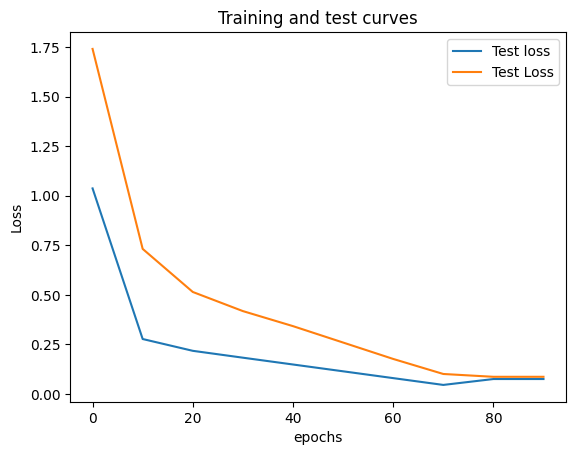

In [194]:
# PLOT THE LOSS CURVES

import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Test loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test curves")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()

In [195]:
weight, bias

(0.7, 0.3)

In [196]:
with torch.inference_mode():
 y_preds_new = model_0(Xtest)

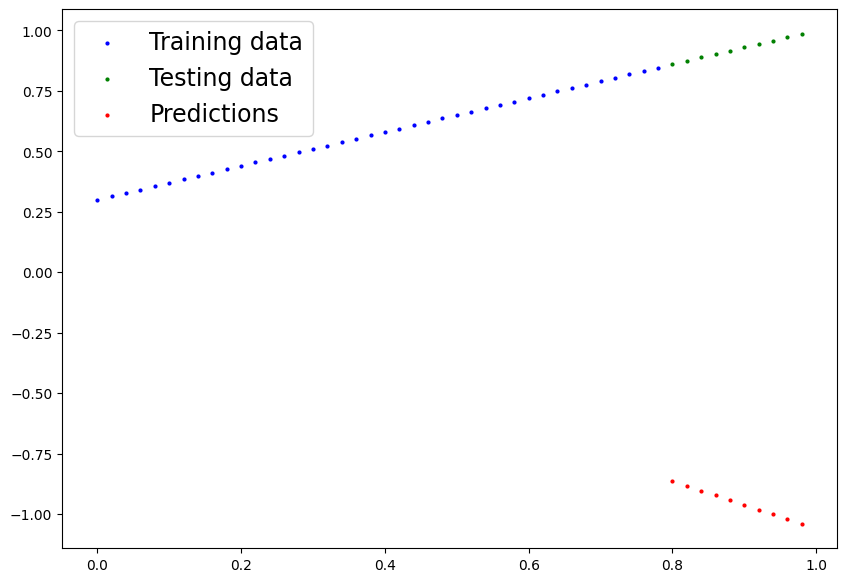

In [197]:
plot_predictions(predictions=y_preds)

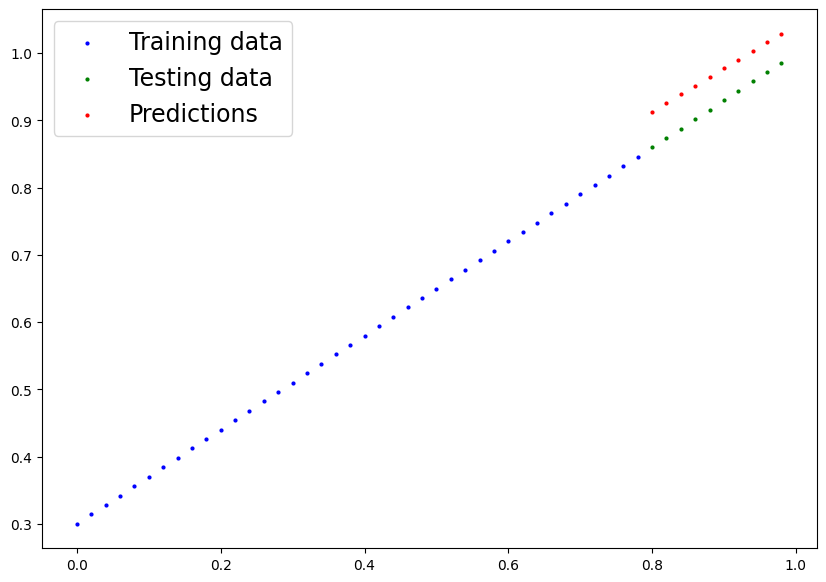

In [198]:
plot_predictions(predictions=y_preds_new)

In [199]:
# SAVING A MODEL IN PYTORCH

# THERE ARE THREE MAIN METHODS YOU SHOULD ABOUT FOR SAVING AND LOADIGNS IN PYTORCH

# 1. torch.save() - allows you save a PyTorch object in Python's pickle format
# 2. torch.load() - allows you load a saved PyTorch object
# 3. torch.nn.Module.load_state_dict() - this allows to a model's saved state dictionary


In [200]:
# SAVING OUR PYTORCH MODEL
import torch
from pathlib import Path

# 1. CREATE MODELS DIRECTORY
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

# 2. CREATE MODEL SAVE PATH
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. SAVE THE MODEL STATE DICT
print(f"saving model to; {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

saving model to; models/01_pytorch_workflow_model_0.pth


In [201]:
# LOADING A PYTORCH MODEL

# SINCE WE SAVED OUR MODEL'S "state_dict()" rather the entire model, we'll create a new
# of our model class and load the saved state_dict() into that


In [202]:
# TO LOAD IN SAVED state_dict() WE HAVE INSTANTIATE A NEW INSTANCE OF OUR MDOEL CLASS
loaded_model_0 = LinearRegressionModel()

#LOAD THE SAVED state_dict() of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [203]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(Xtest)

loaded_model_preds

tensor([[0.9129],
        [0.9258],
        [0.9387],
        [0.9516],
        [0.9645],
        [0.9774],
        [0.9903],
        [1.0032],
        [1.0161],
        [1.0290]])

In [204]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(Xtest)

y_preds

tensor([[0.9129],
        [0.9258],
        [0.9387],
        [0.9516],
        [0.9645],
        [0.9774],
        [0.9903],
        [1.0032],
        [1.0161],
        [1.0290]])

In [205]:
# Compare loaded model preds with original model  preds

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [206]:
# 6. PUTTING IT ALL TOGETHER

In [207]:
# 6.1 DATA

In [208]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

In [209]:
# CREATE DEVICE-AGNOSTIC CODE

# THIS MEAN IF WE'VE GOT ACCESS TO A GPU, OUR CODE WILL USE IT (FOR PONTENTIALLY FASTER COMPUTING)

# IF NNO GPU AVALAIBLE, THE CODE WILL DEFAULT TO USING CPU

In [210]:
# SETUP DEVICE AGNOSTIC CODE

# device = "cuda" if torch.cude.is_available() else "cpu"


In [211]:
# CREATE SOME DATA USING THE LINEAR REGRESION FORMULA OF Y = WEIGHT * X + BIAS

weight = 0.9
bias = 0.5
start = 0
end = 1
step = 0.04

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8 * len(X))
Xtrain, ytrain = X[:train_split], y[:train_split]
Xtest, ytest = X[train_split:], y[train_split:]

print(len(Xtrain))
print(len(Xtest))


20
5


In [272]:
def plotGraphic(Xtrain = Xtrain,
                Xtest = Xtest,
                ytrain = ytrain,
                ytest = ytest,
                preds = None):
  plt.figure(figsize=(10, 7))

  plt.scatter(Xtrain, ytrain, c='g', s=4, label="Training")

  plt.scatter(Xtest, ytest, c="b", s=4, label="Test Data")

  if preds != None:
    plt.scatter(Xtest, preds, c="y", s=4, label="Prediction")

  plt.legend(prop={"size": 17})

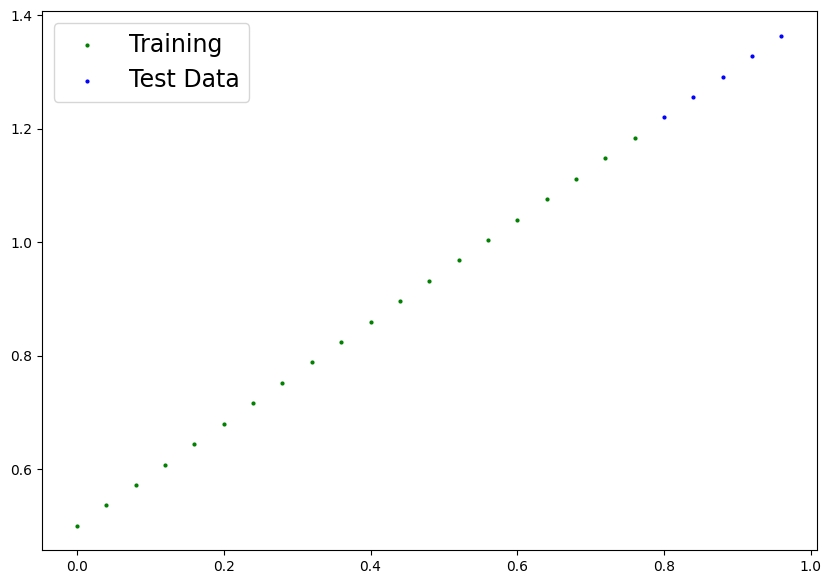

In [213]:
plotGraphic()

In [220]:
class linearFunction(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype= torch.float))

  def forward(self, x : torch.Tensor ) -> torch.Tensor:
    return self.weight * x + self.bias

model_1 = linearFunction()



In [261]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)


In [263]:
epoch = 100

for epochs in range(epoch):
  model_1.train()

  y_preds = model_1(Xtrain)

  loss = loss_fn(y_preds, ytrain)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    predstest = model_1(Xtest)
    test_loss = loss_fn(predstest, ytest )

model_1.state_dict()









OrderedDict([('weight', tensor([0.9099])), ('bias', tensor([0.5040]))])

In [268]:
with torch.inference_mode():
  final_pred = model_1(Xtest)


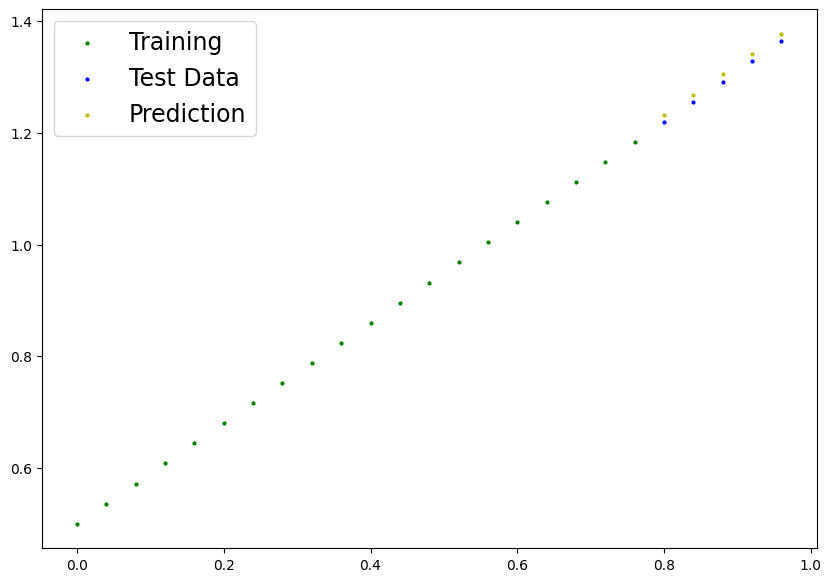

In [273]:
plotGraphic(preds=final_pred)

In [274]:
from pathlib import Path

MODEL = Path("Module1")
MODEL.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "My_firstAI.pth"
MODEL_SAVE = MODEL / MODEL_NAME
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE)

In [276]:
loaded_model_1 = linearFunction()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE))

<All keys matched successfully>